In [43]:
from classy import Class
from pylab import *
import numpy as np
import matplotlib . pyplot as plt

In [70]:
params = {
    'H0': 67.69 , 
    'T_cmb': 2.725,
    'omega_b': 0.02245,
    'omega_cdm': 0.1197,
    'n_s': 0.9718,
    'ln10^{10}A_s': 3.0335,
    'tau_reio': 0.0508,
    'Omega_Lambda': 0.,
    'Omega_k': 0.,
    'fluid_equation_of_state': 'GO',
    'alpha_GO': 0.9652,
    'beta_GO': 0.4826,
    'gauge': 'newtonian', 
    'use_ppf': 'no',
    'k_output_values': '0.0001,0.01, 0.1',
    'evolver': 0, 
    'output': 'tCl,mPk,PCl,lCl'}

In [71]:
cosmo = Class()

In [72]:
cosmo.set(params)

True

In [73]:
cosmo.compute()

In [77]:
cosmo.raw_cl()

{'bb': array([0., 0., 0., ..., 0., 0., 0.]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 3.26163941e-15, ...,
        4.13976101e-19, 4.12290610e-19, 4.10564079e-19]),
 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 6.67091207e-09, ...,
        1.06374487e-22, 1.06080075e-22, 1.05786655e-22]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.41903622e-13, ...,
        -6.75982392e-19, -6.79598866e-19, -6.83157762e-19]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.88774530e-10, ...,
        2.66059778e-22, 2.65433527e-22, 2.64807430e-22]),
 'tt': array([0.00000000e+00, 0.00000000e+00, 1.70121951e-10, ...,
        8.14043283e-18, 8.13198761e-18, 8.12396016e-18])}

In [10]:
cl=cosmo.raw_cl() 

In [11]:
cls=cl.values()

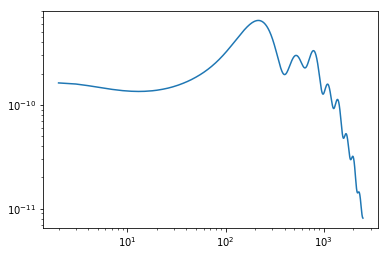

In [12]:
ell=cls[1][2:]
CL=cls[0][2:]
plot(ell,ell*(ell+1.)/2/pi*CL)
yscale('log')
xscale('log')
show()

In [76]:
datos=np.array([0,0]); 
for i in range(0,ell.size):
    datos=np.vstack([datos,np.array([ell[i],ell[i]*(ell[i]+1.)/2/pi*CL[i]]) ])
datos= datos[1:]    

In [81]:
np.savetxt('/home/miguel/class/output/mymodelGOpy_cl.dat',datos,delimiter = '    ')

In [39]:
np.linspace(1.16062e-05,1.69145,572)

array([1.16062000e-05, 2.97384507e-03, 5.93608394e-03, 8.89832280e-03,
       1.18605617e-02, 1.48228005e-02, 1.77850394e-02, 2.07472783e-02,
       2.37095171e-02, 2.66717560e-02, 2.96339949e-02, 3.25962338e-02,
       3.55584726e-02, 3.85207115e-02, 4.14829504e-02, 4.44451892e-02,
       4.74074281e-02, 5.03696670e-02, 5.33319058e-02, 5.62941447e-02,
       5.92563836e-02, 6.22186224e-02, 6.51808613e-02, 6.81431002e-02,
       7.11053390e-02, 7.40675779e-02, 7.70298168e-02, 7.99920556e-02,
       8.29542945e-02, 8.59165334e-02, 8.88787722e-02, 9.18410111e-02,
       9.48032500e-02, 9.77654889e-02, 1.00727728e-01, 1.03689967e-01,
       1.06652205e-01, 1.09614444e-01, 1.12576683e-01, 1.15538922e-01,
       1.18501161e-01, 1.21463400e-01, 1.24425639e-01, 1.27387878e-01,
       1.30350116e-01, 1.33312355e-01, 1.36274594e-01, 1.39236833e-01,
       1.42199072e-01, 1.45161311e-01, 1.48123550e-01, 1.51085788e-01,
       1.54048027e-01, 1.57010266e-01, 1.59972505e-01, 1.62934744e-01,
      

In [60]:
kk = np.linspace(1.16062e-05, 1.106735430664,572) # k in h/ Mpc
Pk = [] # P(k) in ( Mpc /h) **3
h = cosmo.h() # get reduced Hubble for conversions to 1/ Mpc
for k in kk :
    Pk.append(cosmo.pk(k*h ,0.)*h **3) # function .pk(k,z)

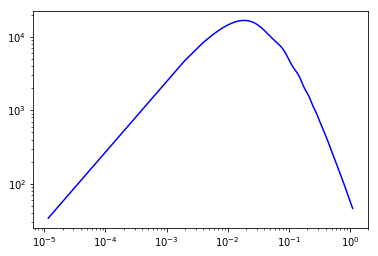

In [61]:
plt.figure(2)
plt.xscale ('log'); plt.yscale('log'); #plt.xlim(kk[0],kk[ -1])
plt.plot(kk ,Pk ,'b-')